# Curso Análisis de Redes

## Cátedra Teoría de las Telecomunicaciones - Universidad ORT Uruguay



# Teoría de Colas (3a. Parte)

In [1]:
#using Pkg;Pkg.instantiate(); Pkg.update()

## Sistemas de fila de espera

Nos interesa modelar sistemas de *eventos discretos* en los cuales:

* Hay un arribo de "trabajos" o "clientes" a cierta tasa $\lambda$ de manera estocástica.
* Los clientes son puestos en una o varias *filas de espera* (colas).
* Cada trabajo es atendido por uno o múltiples *servidores* a cierta *tasa*.
* Al terminar su servicio, el trabajo deja el sistema.

### Diagrama

![Sistema](images/sistema.png "Sistema")

## Notación de Kendall

La notación de Kendall consiste en ciertas abreviaturas para designar sistemas tipo cola-servidor.

**Parámetros que definen un sistema:**

* El proceso de arribos. ($A$)
* El proceso de servicios ($S$)
* El número de servidores ($m$)
* La capacidad del sistema ($K$)
* La disciplina de servicio ($D$) (ej: FIFO, LIFO, RANDOM)

**Notación de Kendall:**

Es simplemente describir la cola como: $$A/S/m/K - D.$$ 

### Notación de Kendall - ejemplos

* Para el proceso de arribos y servicios se utilizan (entre otras):
   * $M$ para indicar exponencial (sin memoria).
   * $D$ para indicar determinístico.
   * $G$ si es una distribución genérica.

* Si la capacidad $K=\infty$ se omite. Si la disciplina es FIFO en general se omite también.

**Ejemplos:**

 * Cola $M/M/1$: arribos y servicios exponenciales, $1$ servidor, capacidad infinita de cola.
 * Cola $M/M/\infty$: arribos y servicios exponenciales, no hay límite de servidores.
 * Cola $M/M/m$: arribos y servicios exponenciales, $m$ servidores, no hay límite de cola.
 * Cola $M/G/1 - LIFO$, arribos exponenciales, servicios genéricos, $1$ servidor, cola infinita, LIFO .

## Sistemas con bloqueo (loss systems)

Hasta ahora, los sistemas que analizamos tienen capacidad infinita en la cola. En general la discusión en esos casos pasa por garantizar la estabilidad y analizar el retardo de los clientes.

> **Sistemas en base a pérdidas:**
>
> Son aquellos sistemas *tienen un número máximo de clientes que pueden servir*. Todos los clientes que llegan cuando el sistema está "completo" son rechazados.

**Parámetro de performance:**
$$B = P(bloqueo)$$

Es decir, la probabilidad de que un cliente llegue al sistema y sea rechazado.

### Estabilidad y probabilidad de bloqueo

* En general estos sistemas *siempre son estables*, pues tienen una cantidad finita de estados.

* Sin embargo, si el sistema tiene alta "carga", deberá operar con una probabilidad de bloqueo alta para poder compensar.

**Ejemplo:** Si tenemos una cola $M/M/1$, cuando la carga $\rho>1$, este sistema es inestable. Si en cambio la cola tiene un límite finito, el sistema es estable pero la probabilidad de bloqueo se dispara.

Analicemos más en detalle este ejemplo a continuación

## La cola $M/M/1/K$

Este sistema es análogo al sistema cola-servidor ya estudiado, con arribos Poisson, servicios exponenciales y un número máximo $K$ de clientes en el sistema.

![Cola M/M/1/K](images/mm1k.png)

### Modelo como CMTC

Tomando nuevamente $X(t)=$no. de clientes en el sistema, tenemos que:

* $X(t) \in E = \{0,1,2,\ldots,K\}$.
* Arribos a tasa $\lambda$ de $0$ a $K-1$.
* Servicios a tasa $\mu$ de $1$ a $K$.

Con lo cual el diagrama de estados es:

![Diagrama de estados cola M/M/1/K](images/mm1k_markov.png)

### Ecuaciones de balance

Notemos que las ecuaciones de balance local son *exactamente las mismas que en la cola $M/M/1$*. Simplemente el espacio de estados se vio recortado.

$$\begin{align} \pi_0 \lambda &= \pi_1 \mu \\ \pi_1\lambda &= \pi_2\mu \\ &\vdots \\\pi_{K-1}\lambda &= \pi_K \mu.\end{align}$$

* Como la cadena es finita, el sistema *siempre es estable*.

* Definiendo $\rho=\lambda/\mu$, La distribución debe cumplir: 

$$\pi_k = \pi_0 \rho^k,$$

al igual que en la cola $M/M/1$

### Distribución de régimen

Imponiendo que todas las probabilidades sumen $1$ obtenemos:

$$1=\sum_{k=0}^K \pi_k = \pi_0 \sum_{k=0}^K \rho^k = \pi_0 \frac{1-\rho^{K+1}}{1-\rho}$$

para el caso $\rho\neq 1$, de donde:

$$\pi_0 = \frac{1-\rho}{1-\rho^{K+1}} \quad \pi_k = \frac{1-\rho}{1-\rho^{K+1}} \rho^k, \quad k=0,1,2,\ldots,K.$$


**Nota:** si $\rho=1$ todas las probabilidades son iguales y $\pi_0=1/(K+1)$.



In [2]:
function equilibrio_mm1k(rho,K)
    k=(0:K)
    pi = zeros(size(k))
    
    pi[1] = 1
    
    for i=1:K
        pi[i+1] = pi[i]*rho
    end
    pi=pi/sum(pi)
    
    return k,pi
end

equilibrio_mm1k (generic function with 1 method)

### Ejemplo, $K=10$.

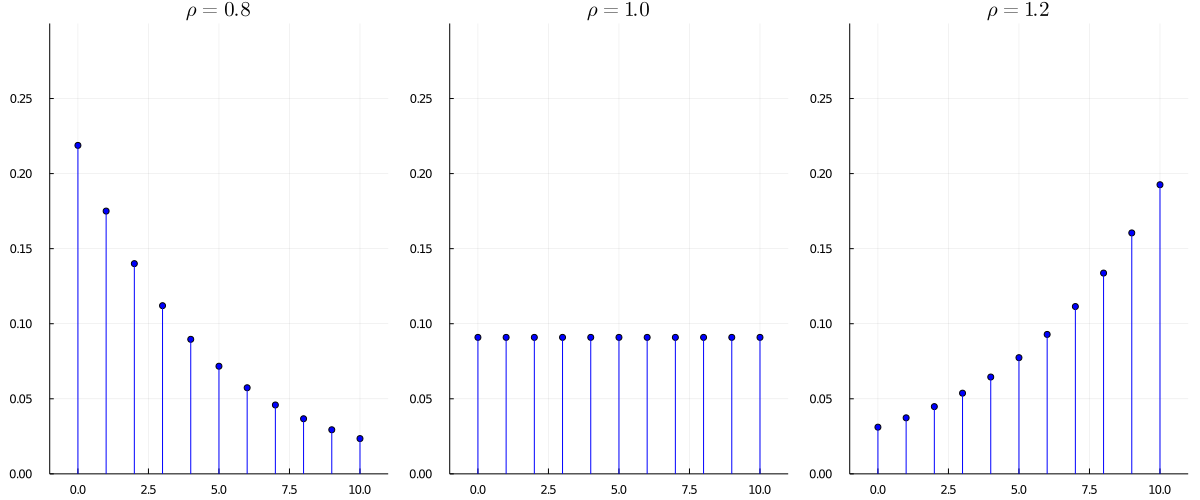

In [3]:
using Plots, LaTeXStrings
default(size=(1200,500), legendfontsize=12)

K=10

plot([equilibrio_mm1k(0.8,K),equilibrio_mm1k(1.0,K),equilibrio_mm1k(1.2,K)], 
    xlim=(-1,K+1), ylim=(0,.3), lt=:stem, marker=:circle, color=:blue, 
    layout=(1,3),title=[L"\rho=0.8" L"\rho=1.0" L"\rho=1.2"], legend=:none)

### Probabilidad de bloqueo

En el sistema anterior, no modelamos *en el estado* lo que ocurre si llegan arribos mientras el sistema está lleno. Sin embargo podemos pensar que *siguen ocurriendo arribos* mientras el sistema está en el estado $K$ (aunque no modifiquen el mismo).

**Observación:** como los arribos son Poisson, por la propiedad PASTA, ven al sistema en régimen, por lo tanto:

$$B = P(bloqueo) = P(X(T_n^-)=K) = \pi_k.$$

De donde:

$$B = \frac{1-\rho}{1-\rho^{K+1}} \rho^K$$

es decir, la probabilidad de sistema lleno.

### Ejemplo: variación de $B$ con $\rho$.

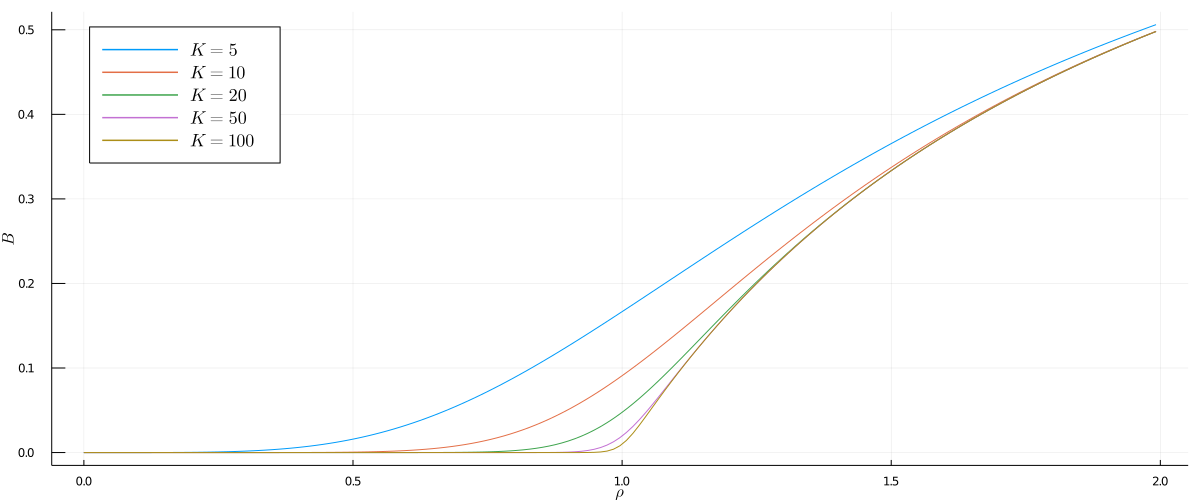

In [4]:
bloqueo_mm1k(rho,K) = (1-rho)*rho^K/(1-rho^(K+1))

K=[5,10,20,50,100]

r = (0:.012:2)

p=plot(legend=:topleft, xlabel=L"\rho", ylabel=L"B")
for k in K
    plot!(p,r,bloqueo_mm1k.(r,k), label=L"K=%$k")
end
p

### Comportamiento para $K\to\infty$

De la gráfica anterior podemos deducir el siguiente comportamiento:

* Si $\rho<1$, cuando $K\to \infty$, $B\to 0$ (ya que el sistema sin limitación es estable).

* Si $\rho>1$, cuando $K\to \infty$, $B$ tiene el siguiente límite:

$$B\to_{k\to\infty} \frac{\lambda-\mu}{\lambda} = 1 - \frac{1}{\rho},$$

es decir, básicamente el sistema "recorta" todos los arribos que sobran.

## Cálculo en general de la probabilidad de bloqueo en sistemas de pérdida

El procedimiento anterior es general para sistemas con arribos Poisson. Es decir:

$$B = P(bloqueo) = \sum_{k\in \mathcal{B}} \pi_k,$$

siendo $\mathcal{B}$ el conjunto de todos los estados que producen bloqueo.

## El sistema telefónico (A.K. Erlang, 1917)
<img style="float:right; width: 150px; margin-left: 1em" src="images/Erlang.jpg" />

Un modelo de los sistemas de telefonía clásica es el siguiente:

> **Sistema telefónico:**
>
> * Llegan llamadas como un proceso de Poisson de tasa $\lambda$.
> * Las llamadas son exponenciales con duración media $\bar{T} = 1/\mu$.
> * El sistema dispone de $C$ circuitos simultáneos.
> * Si no hay circuitos disponibles, la llamada se descarta inmediatamente.


O bien, en la notación de Kendall, es el sistema $M/M/C/C$ ($C$ servidores, $C$ lugares total). Notar que en particular el sistema no forma cola.

### Diagrama del sistema

![Sistema telefonico](images/mmcc.png)

### Modelo como cadena de Markov

Si $X(t)=$no. de circuitos ocupados (o equivalentemente, llamadas en curso), entonces:

* El espacio de estados es $E=\{0,1,\ldots,C\}$
* Los arribos son a tasa $\lambda$.
* Si hay $k$ llamadas en curso, la tasa de $k\to k-1$ es $k\mu$

**Diagrama de estados:**

![Cola MMCC](images/mmcc_markov.png)

### Distribución estacionaria

**Observación:** el sistema es igual a la cola $M/M/\infty$ ya analizada, pero cortado en $C$. Por lo tanto, las ecuaciones de balance son las mismas, y la distribución de equilibrio tiene la forma:

$$\pi_k = \pi_0 \frac{(\lambda/\mu)^k}{k!}.$$

> **Definición:** Se define la *intensidad de tráfico* del sistema telefónico como:
>
> $$A = \frac{\lambda}{\mu} = \lambda \bar{T} = (\text{frec. de llamada}) \times (\text{duracion media})$$
>
> Decimos que el sistema tiene $A$ "Erlangs" de tráfico.

**Idea:** $A$ es la cantidad media de circuitos ocupados si hubiera infinitos disponibles.

### Distribución estacionaria

Sustituyendo $A=\lambda/\mu$ queda $\pi_k = \pi_0 \frac{A^k}{k!}$. Imponiendo $\sum_k \pi_k = 1$ queda:

$$1 = \sum_{k=0}^C \pi_k = \pi_0 \sum_{k=0}^C \frac{A^k}{k!}.$$

De donde:

$$\pi_0 =\frac{1}{1+A+A^2/2 + \ldots + A^C/C!}, \quad \pi_k = \frac{A^k/k!}{\sum_{j=0}^C A^j/j!}.$$

El sistema es estable para todo $A$ por ser finito.

### Probabilidad de bloqueo (Fórmula de Erlang-B)

Observando que el sistema bloquea cuando $X=C$ (está lleno), la probabilidad de bloqueo queda:

$$B = B(A,C) = \pi_C = \frac{\frac{A^C}{C!}}{1+A+\frac{A^2}{2}+ \ldots + \frac{A^C}{C!}}.$$

Esta última se denomina **fórmula de Erlang-B** y es la base del sistema telefónico. La función $B(A,C)$ se puede calcular recursivamente pero también se encuentra tabulada.

In [5]:
function erlangB(A,C)
    
    aux = 1       #calcula recursivamente el termino del numerador
    sum = aux     #calcula la suma del denominador
    
    for i=1:C
        aux = aux * A/i
        sum=sum+aux
    end
    
    return aux/sum
end

erlangB (generic function with 1 method)

### Ejemplo: variación de $B$ con la intensidad de tráfico.

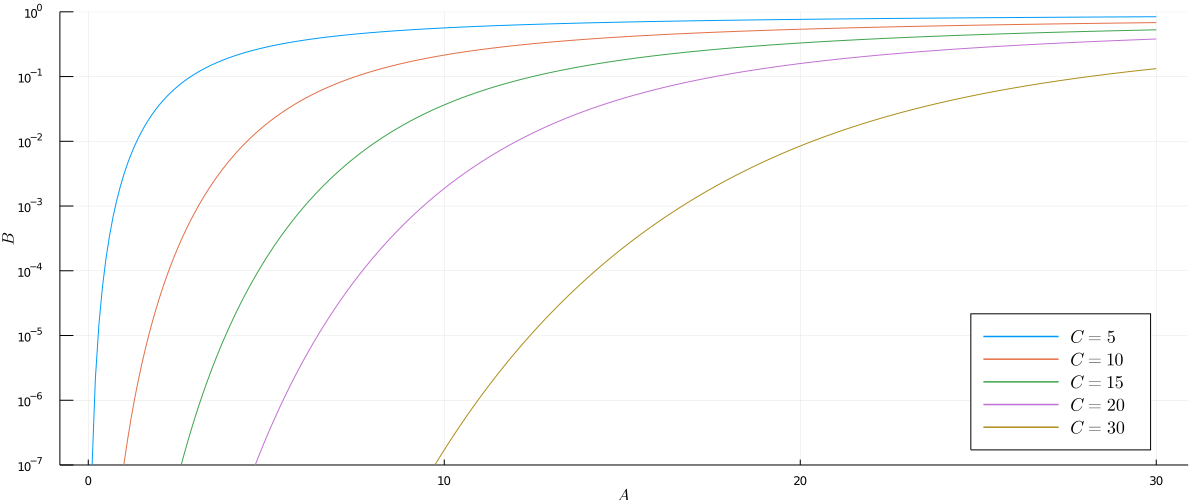

In [6]:
p = plot(xlabel=L"A", ylabel=L"B", legend=:bottomright, yaxis=:log, ylim=(1e-7,1))

A=(.1:.1:30)
C=[5,10,15,20,30]

for c in C 
    plot!(p,A,erlangB.(A,c), label=L"C=%$c")
end
p

### Ejemplo: variación de $B$ con la cantidad de circuitos.

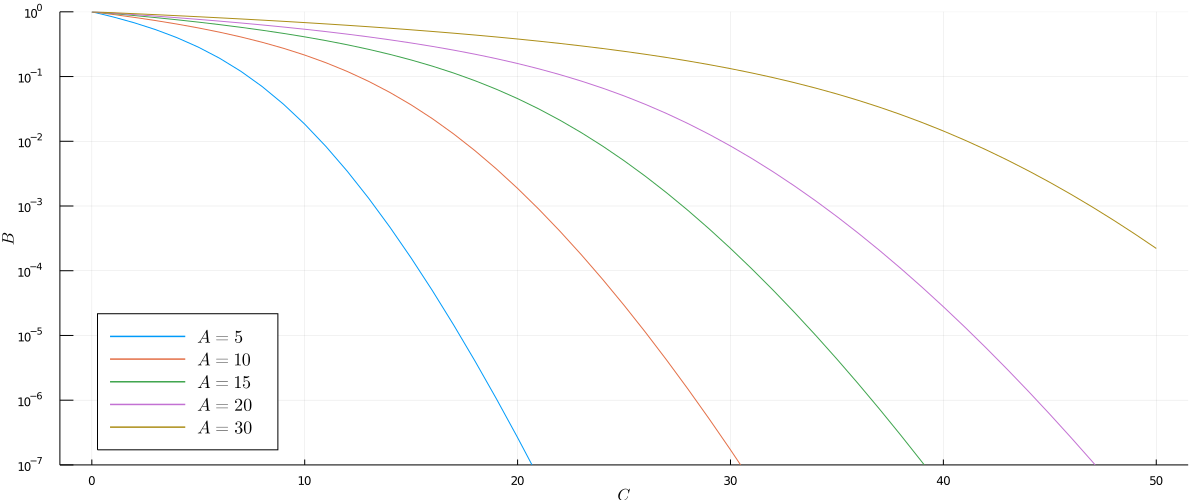

In [7]:
p = plot(xlabel=L"C", ylabel=L"B", legend=:bottomleft, yaxis=:log, ylim=(1e-7,1))

A=(5,10,15,20,30)
C=(0:1:50)

for a in A 
    plot!(p,C,erlangB.(a,C), label=L"A=%$a")
end
p

### Tabla de Erlang

De las gráficos anteriores, observamos que:

* $B(A,C)$ es **creciente** con $A$ para $C$ fijo ($+$ trafico $\to$ $+$ bloqueo).
* $B(A,C)$ es **decreciente** con $C$, para $A$ fijo ($+$ circuitos $\to$ $-$ bloqueo).

Esto permite generar *tablas de teletráfico* ([ejemplo](https://www.pitt.edu/~dtipper/2110/erlang-table.pdf)). En estas tablas se indica el **máximo tráfico $A$ que permite una probabilidad de bloqueo $B$ para $C$ dado**.

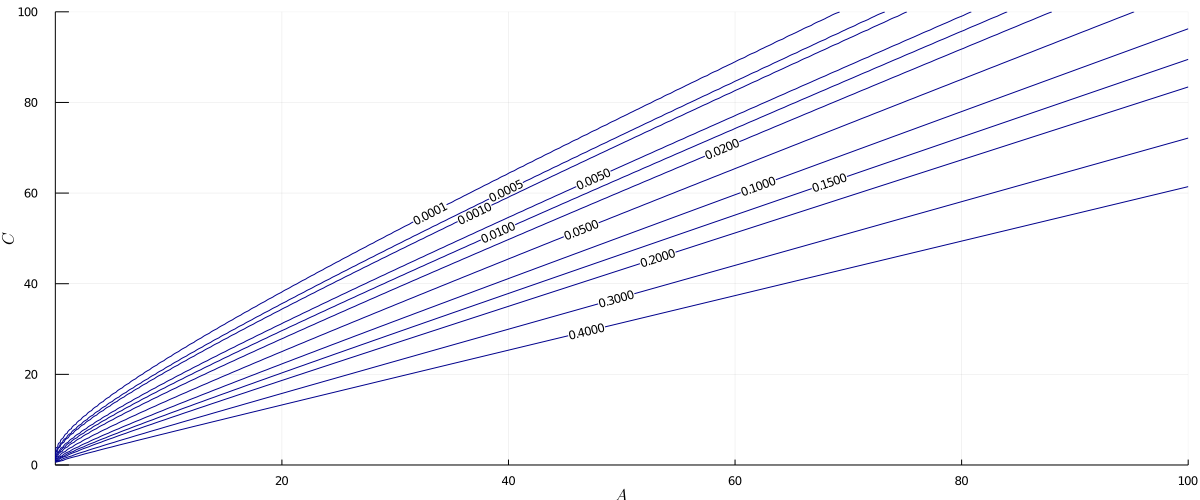

In [8]:
A = 10.0.^(range(-6,stop=2,length=1000))

C=(0:100)

contour(A,C,erlangB, levels=[1e-4,5e-4, 1e-3,5e-3,1e-2,2e-2, 5e-2, 0.1,0.15,0.2,0.3,0.4], contour_labels=true, colorbar=false, color=:darkblue, xlabel=L"A", ylabel=L"C")

## Ejercicio 1

Un concentrador telefónico fue diseñado para operar con $C = 30$ circuitos. Las llamadas llegan a tasa
$\lambda = 300$ llamadas por hora y tienen una duración media de $3$ min.

 1. Calcule usando la recursión de Erlang provista la probabilidad de bloqueo del sistema. Coteje con la [tabla de Erlang](https://www.pitt.edu/~dtipper/2110/erlang-table.pdf).
 2. Indique cuál es la tasa máxima de llamadas que puede recibir el sistema, asumiendo que la duración se mantiene, sin que el grado de servicio supere el 0.5\% ($B<0.005$).
 3. Debido a un cambio en la tarifa, las llamadas pasan a durar en media $5$ min. Calcule cuántos circuitos se deben agregar para mantener el grado de servicio.
 4. Simule el sistema y verifique lo obtenido anteriormente.

## Ejercicio 2

Un call center está dividido en dos etapas: la primera etapa dispone de $C$ lı́neas donde se reciben llamadas como un proceso de Poisson de intensidad $\lambda$, y cada una es atendida por un técnico de primer nivel. Supondremos que si un usuario llama y no hay lı́neas disponibles, el mismo es bloqueado y deja el sistema
inmediatamente.

Al culminar la primera etapa, o bien el usuario se va satisfecho (con probabilidad $1-p$), o bien es pasado a un técnico de segundo nivel (con probabilidad $p$). El técnico de segundo nivel es uno solo y las llamadas entrantes son puestas en espera si éste está ocupado.

   1. Dé un diagrama de bloques del sistema usando colas de las vistas en el curso.
   2. Si se sabe que $\lambda = 8$ llamadas/min, y que la duración media de llamada en el primer nivel es $1/\mu_1 = 4$ min., halle la cantidad de circuitos necesarios en el primer nivel para que la probabildad de rechazo sea $B ≈ 0.05$.
   3. Asumiendo que $B = 0.05$, calcule $\lambda_2$, la tasa media de salida de la primera etapa.
   4. Si en el segundo nivel la duración media de atención es $1/\mu_2$ = 2 min. calcule el máximo valor de $p$ que permite que el 2o. nivel opere de forma estable.
   5. Si el gerente desea que el retardo medio total en el sistema de un cliente que pasa por las dos etapas sea < 10 min., calcule el máximo valor de p que permite cumplir con el pedido.